In [1]:
# Create dummy 7 data
import MV2
corr = [.2, .5, .7, .85, .9, .95, .99]
std = [1.6, 1.7, 1.5, 1.2 , .8, .9, .98]
data = MV2.array(zip(std, corr))
data.id = "My Taylor Diagram Data"

# Markers attributes for later
ids = ["A1","A2","A3","B","C1","C2","C3"]
sizes = [25., 5., 20., 20., 20., 20., 20.,]
symbols = ["square","dot","circle","triangle_right","triangle_left","triangle_up","triangle_down"]
colors = ["red","black","black","black","black","black","blue"]
id_sizes = [20., 15., 15., 15., 15., 15., 15.,]
id_colors = ["orange","grey","grey","grey","grey","grey","cyan"]


print data.shape

(7, 2)


/Users/doutriaux1/anaconda2/envs/2.12-nox/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/doutriaux1/anaconda2/envs/2.12-nox/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


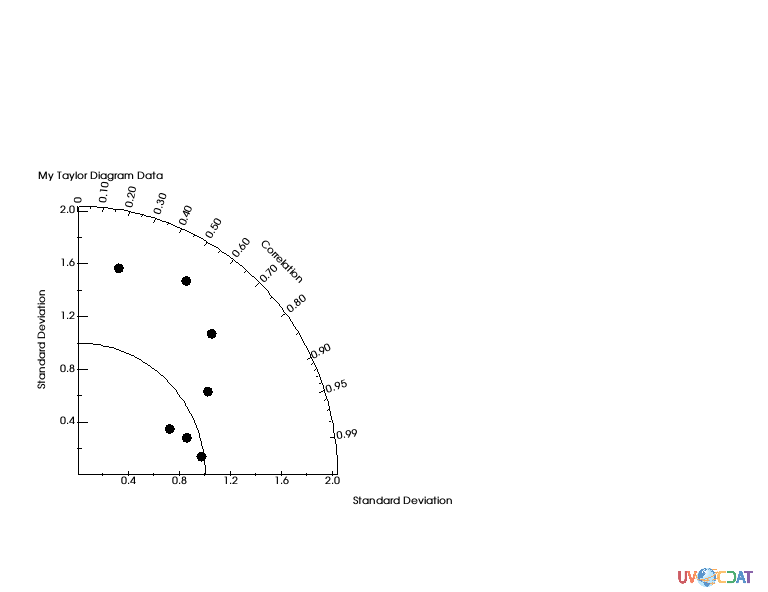

In [2]:
import vcs
taylor = vcs.createtaylordiagram()
x=vcs.init()
x.plot(data,taylor)

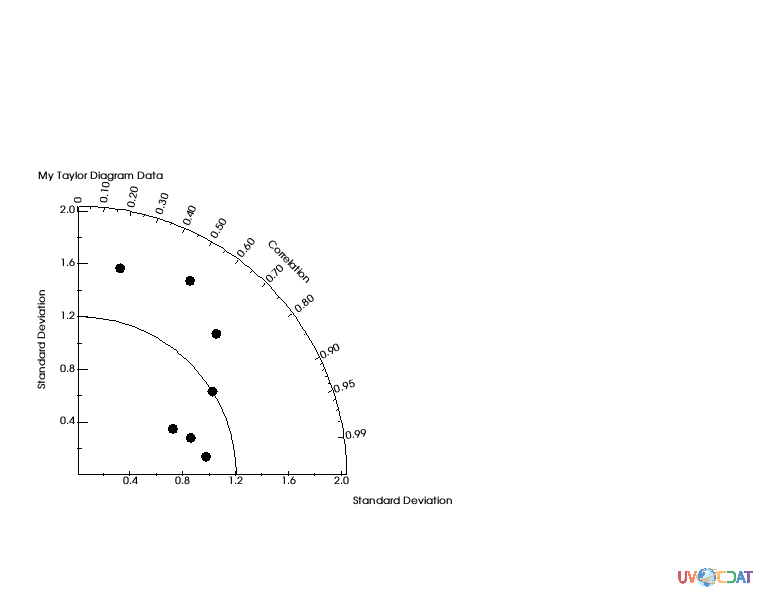

In [3]:
# Reference point
taylor.referencevalue=1.2
x.clear()
x.plot(data,taylor)

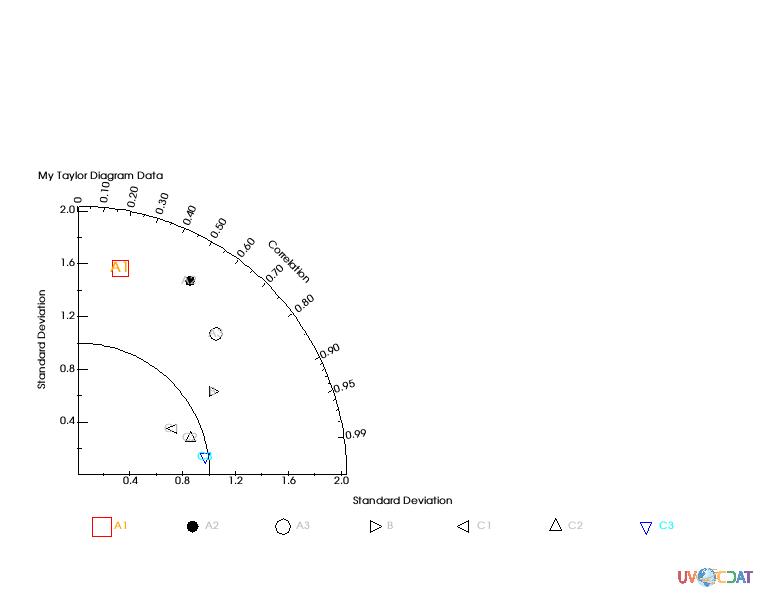

In [4]:
taylor = vcs.createtaylordiagram()
for i in range(len(std)):
    #taylor.list()
    taylor.addMarker(id=ids[i],
                     id_size=id_sizes[i],
                     id_color=id_colors[i],
                     symbol=symbols[i],
                     color=colors[i],
                     size=sizes[i])
x.clear()
x.plot(data,taylor)


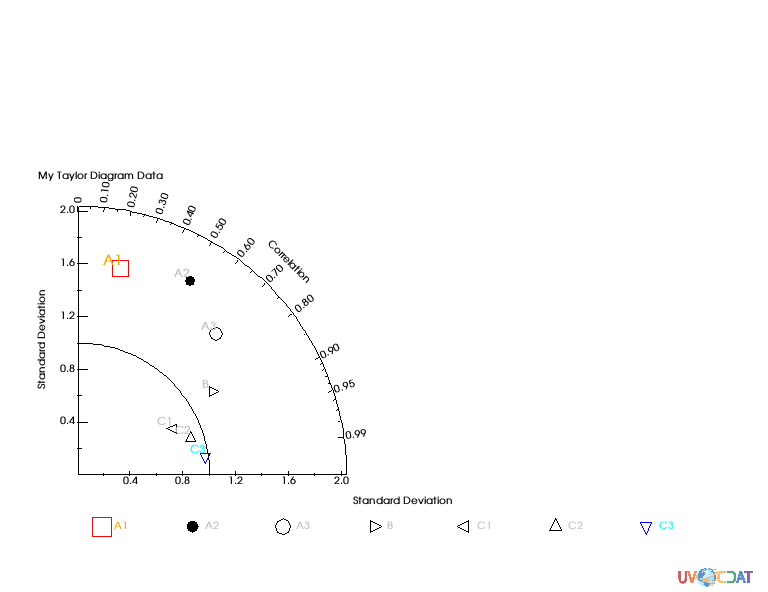

In [5]:
taylor = vcs.createtaylordiagram()
for i in range(len(std)):
    #taylor.list()
    taylor.addMarker(id=ids[i],
                     id_size=id_sizes[i],
                     id_color=id_colors[i],
                     symbol=symbols[i],
                     color=colors[i],
                     size=sizes[i],
                     xoffset=-2.5,
                     yoffset=2.5)
x.clear()
x.plot(data,taylor)


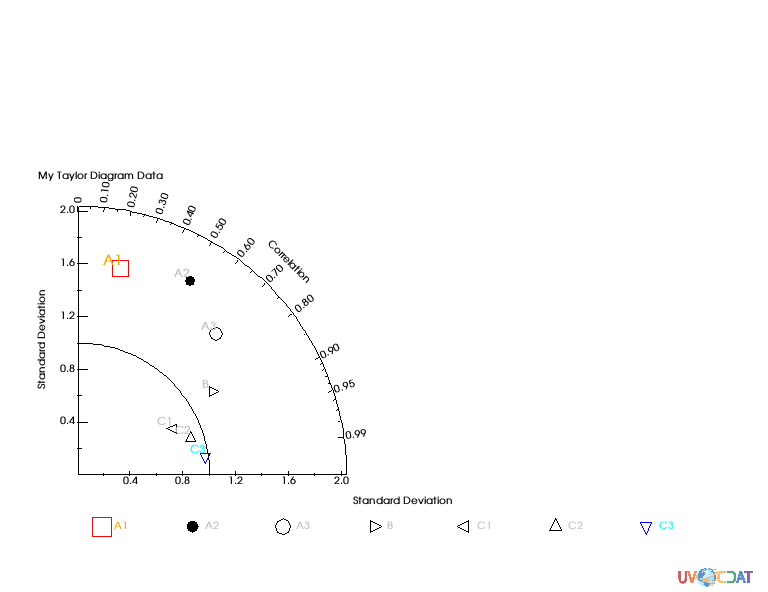

In [6]:
# Other way to set marker attributes
taylor = vcs.createtaylordiagram()
taylor.Marker.id = ids
taylor.Marker.id_size = id_sizes
taylor.Marker.id_color = id_colors
taylor.Marker.symbol = symbols
taylor.Marker.color = colors
taylor.Marker.size = sizes
taylor.Marker.xoffset = [-2.5,]*len(std)
taylor.Marker.yoffset = [2.5]*len(std)
x.clear()
x.plot(data,taylor)

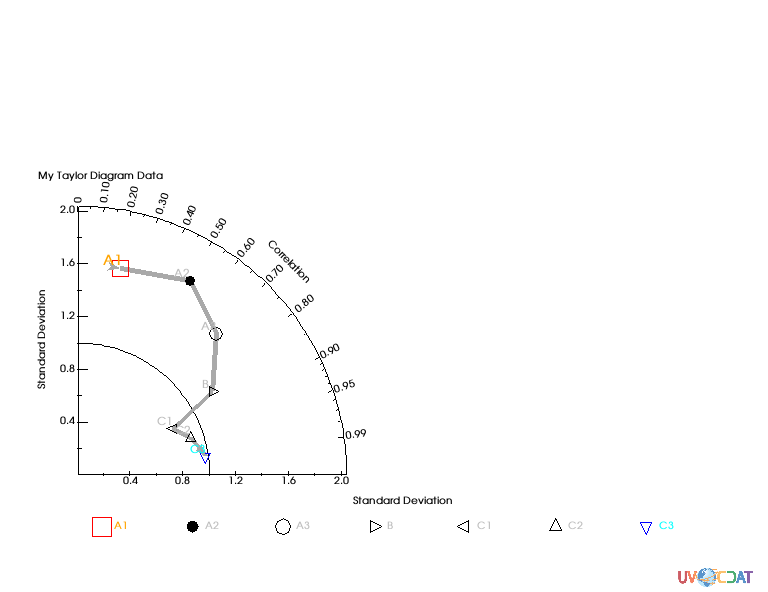

In [7]:
taylor.Marker.line = ["tail","line","line","line","line","line","head"]
taylor.Marker.line_type = ["solid",]*len(std)
taylor.Marker.line_color = ["dark grey",]*len(std)
taylor.Marker.line_size = [5.,5.,5.,5.,5.,5.,5.]
x.clear()
x.plot(data,taylor)

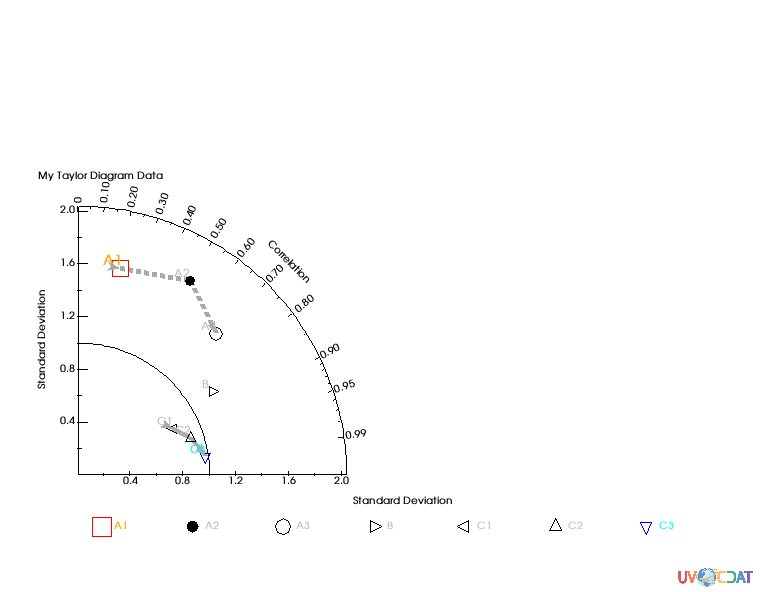

In [8]:
#let's split the line into 2 set of line with an empty marker in-between
# First line dashed
taylor.Marker.line =  ['tail', 'line', 'head', None, 'tail', 'line', 'head']
taylor.Marker.line_type = ["dash","dash","dash","solid","solid","solid","solid"]
x.clear()
x.plot(data,taylor)

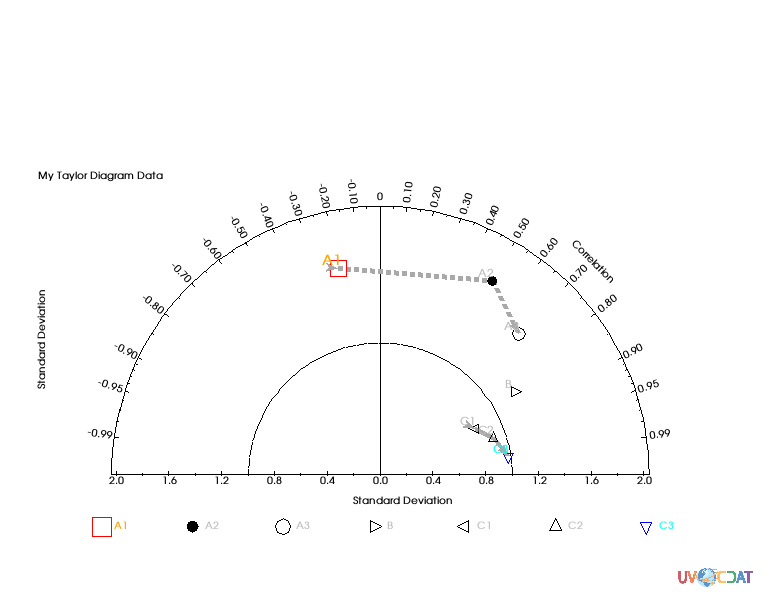

In [9]:
# Negative correlation: Two quadrans
data[0,1] = -data[0,1]
x.clear()
taylor.quadrans = 2
x.plot(data,taylor)

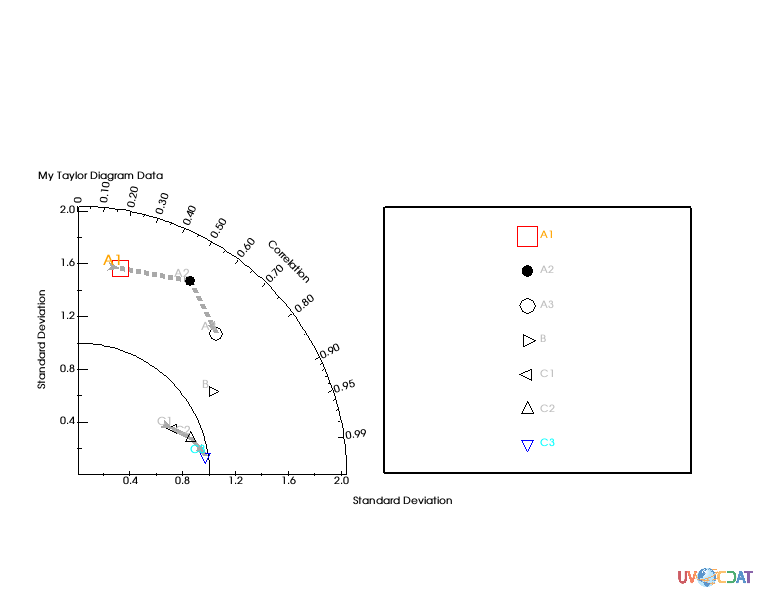

In [10]:
# Better legend postionment for 1 quadran
data[0,1] = -data[0,1]
x.clear()
taylor.quadrans = 1
template = vcs.createtemplate(source="deftaylor")
template.legend.x1 = .5
template.legend.x2 = .9
template.legend.y1 = .2
template.legend.y2 = .65
template.legend.line = "black"
x.plot(data,taylor,template)

/Users/doutriaux1/anaconda2/envs/2.12-nox/lib/python2.7/site-packages/vcs/VTKPlots.py:998: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  data[:] = numpy.ma.masked_invalid(data, numpy.nan)


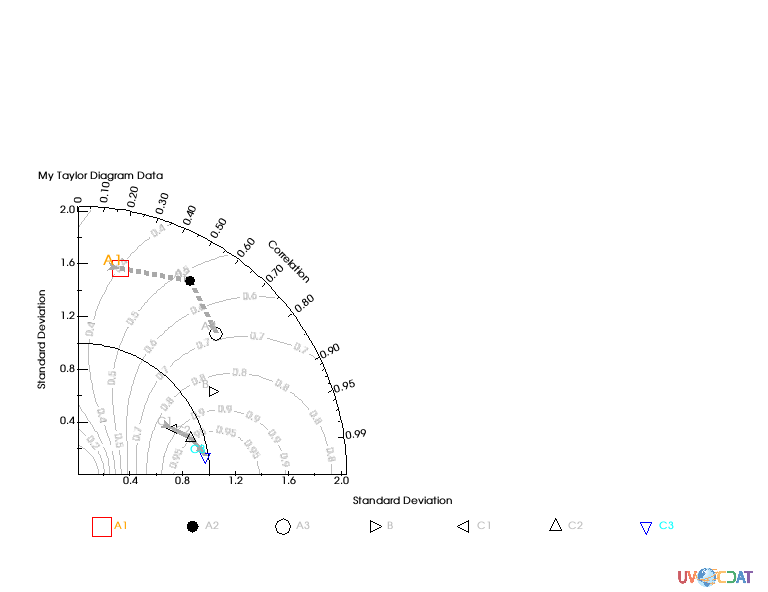

In [11]:
#Skill scrores
x.clear()
x.plot(data,taylor,skill=taylor.defaultSkillFunction)

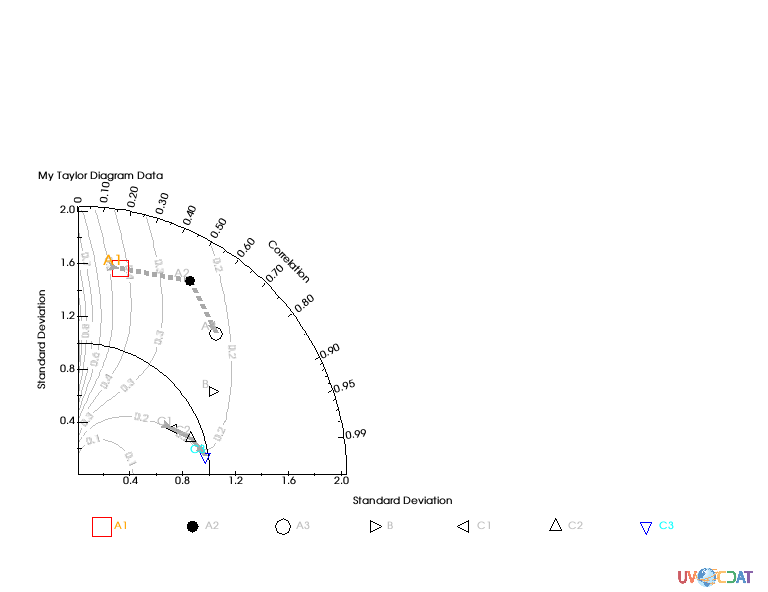

In [12]:
def mySkill(s,r):
    return (4*numpy.ma.power(1+r,4))/(numpy.power(s+1./s,2)*numpy.power(1+r*2.,4))
x.clear()
x.plot(data,taylor,skill=mySkill)